# Final Project

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as ode

In [2]:
def binary(t, y):
    '''
    index:    0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11
    input:   x1,  y1,  z1,  x2,  y2,  z2, vx1, vy1, vz1, vx2, vy2, vz2 
    output: vx1, vy1, vz1, vx2, vy2, vz2, ax1, ay1, az1, ax2, ay2, az2,
    '''
    X = y[0]-y[3]
    Y = y[1]-y[4]
    Z = y[2]-y[5]
    r = np.sqrt(X**2 + Y**2 + Z**2)
    
    # theta = np.arctan2(Y,X)
    vx1 = y[6]
    vy1 = y[7]
    vz1 = y[8]
    vx2 = y[9]
    vy2 = y[10]
    vz2 = y[11]
    ax1 = -G*m2/r**2 * X/r
    ay1 = -G*m2/r**2 * Y/r
    az1 = -G*m2/r**2 * Z/r
    ax2 = -G*m1/r**2 * (-X/r)
    ay2 = -G*m1/r**2 * (-Y/r)
    az2 = -G*m1/r**2 * (-Z/r)
    return np.array([vx1, vy1, vz1, vx2, vy2, vz2, ax1, ay1, az1, ax2, ay2, az2]) 

In [ ]:
# Msun = 1.989e30                 # (kg)
# m    = 5.972e24
# mu   = Msun * m / (Msun + m)
# G    = 6.67430e-11
# au   = 1.49598e11               # (meter)
# k    = G*Msun*m
# w    = 2*np.pi/365/86400        # average angular velocity
# l    = mu * au**2 * w
# e    = 0.0167                   # eccentricity
# alpha= l**2 / mu / k
# a    = alpha / (1-e**2)         #半長軸 major axis
# foci = a*e

In [28]:
m1 = 3e30
m2 = 2e30
mu   = m1 * m2 / (m1 + m2)
G    = 6.67430e-11              # mks
day = 86400
year= 365.25*day
period = 1*year

r_avg  = 1.49598e11               # (meter) 
k    = G*m1*m2
w    = 2*np.pi/period        # average angular velocity
l    = mu * r_avg**2 * w
e    = 0.8                   # eccentricity
alpha= l**2 / mu / k
a    = alpha / (1-e**2)         #半長軸 major axis
foci = a*e

In [29]:
# initial condition
r1_init = a* m2/(m1+m2)
r2_init = a* m1/(m1+m2)
theta_dot = l / mu / (r1_init + r2_init)**2
v1_init = r1_init*theta_dot
v2_init = r2_init*theta_dot

In [30]:
tf  = year*1
y0  = np.array([r1_init, 0, 0, -r2_init, 0, 0, 0, v1_init, 0, 0, -v2_init, 0])
t_eval = np.linspace(0,tf,100)

motion = ode.solve_ivp(binary, t_span=(0,tf), y0=y0, method='RK45', 
                      t_eval=t_eval, dense_output=True, vectorized=True)
motion2 = ode.solve_ivp(binary, t_span=(0,tf), y0=y0, method='DOP853', 
                      t_eval=t_eval, dense_output=True, vectorized=True)

<function matplotlib.pyplot.show(close=None, block=None)>

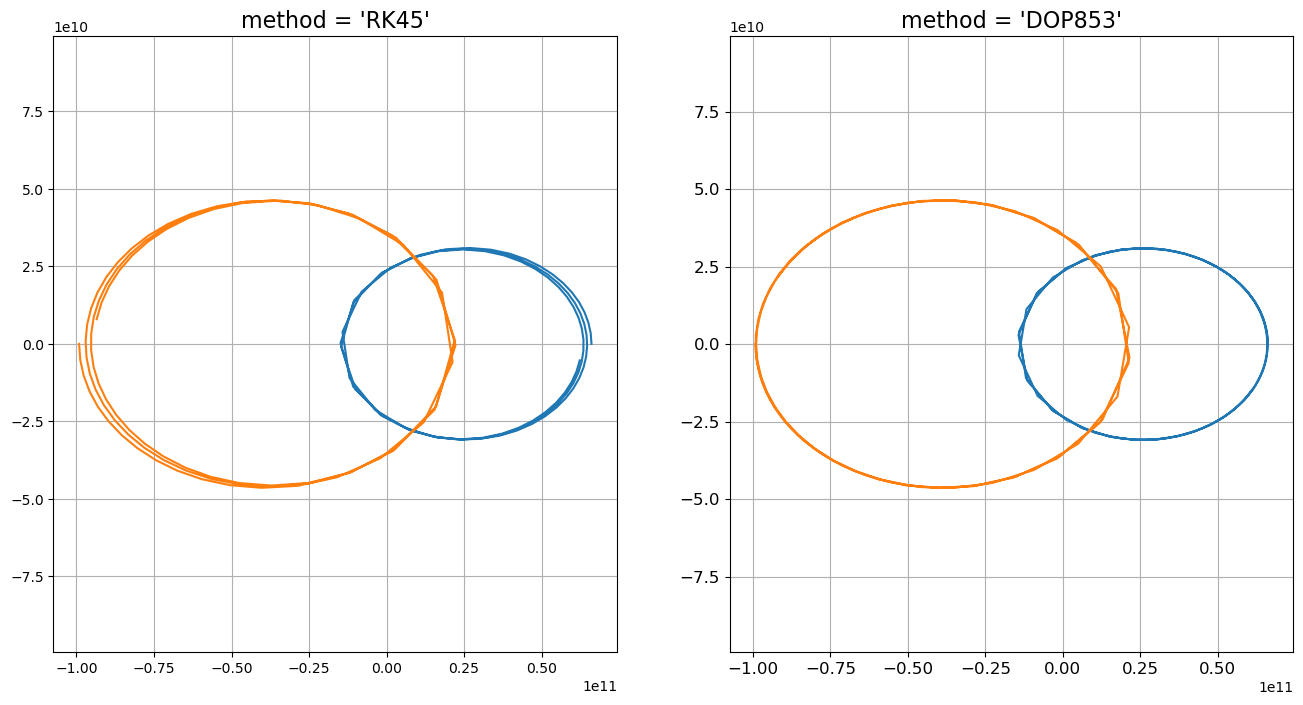

In [31]:
fig = plt.figure(figsize=(16,8))
ax = fig.subplots(1,2)
ax[0].plot(motion.y[0],motion.y[1])
ax[0].plot(motion.y[3],motion.y[4])
ax[1].plot(motion2.y[0],motion2.y[1])
ax[1].plot(motion2.y[3],motion2.y[4])
ax[0].set_title("method = 'RK45'",fontsize=16)
ax[1].set_title("method = 'DOP853'",fontsize=16)
ax[0].grid()
ax[1].grid()
ax[0].axis("equal")
ax[1].axis("equal")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show

## Limb-darkening effect

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as ode

### logarithmic law  &  square root law

In [2]:
def D_logari(x, y, ratio):
    cos = np.sqrt(1 - ratio**2)
    D_log = 1 - x*(1-cos) - y*cos*np.log(cos)
    return D_log

In [3]:
def D_sqroot(x, y, ratio):
    cos = np.sqrt(1 - ratio**2)
    D_sqroot = 1 - x*(1-cos) - y*(1-np.sqrt(cos))
    return D_sqroot

In [5]:
R = 6.96340*1e5  # kilometer
r = np.linspace(0,R,101)
X = 0.648
Y = 0.207
# D_sqrt = D_sqroot(x, y, r/R)
n = 100
ratio = np.linspace(-1,1,n)
D_log  = D_logari(X, Y, ratio)
D_sqrt = D_sqroot(X, Y, ratio)
print(D_log)

[       nan 0.54822283 0.60819372 0.6501306  0.68315497 0.71065333
 0.73431276 0.75511304 0.77368077 0.79044422 0.80571086 0.81970985
 0.83261716 0.84457118 0.85568299 0.86604323 0.87572692 0.88479692
 0.89330647 0.90130109 0.90882    0.91589722 0.9225625  0.92884195
 0.93475863 0.94033297 0.94558318 0.9505255  0.95517448 0.95954318
 0.96364336 0.96748562 0.97107949 0.97443361 0.97755578 0.98045301
 0.98313165 0.98559742 0.98785544 0.98991031 0.99176614 0.99342656
 0.99489478 0.99617357 0.99726535 0.99817213 0.99889558 0.99943703
 0.99979745 0.9999775  0.9999775  0.99979745 0.99943703 0.99889558
 0.99817213 0.99726535 0.99617357 0.99489478 0.99342656 0.99176614
 0.98991031 0.98785544 0.98559742 0.98313165 0.98045301 0.97755578
 0.97443361 0.97107949 0.96748562 0.96364336 0.95954318 0.95517448
 0.9505255  0.94558318 0.94033297 0.93475863 0.92884195 0.9225625
 0.91589722 0.90882    0.90130109 0.89330647 0.88479692 0.87572692
 0.86604323 0.85568299 0.84457118 0.83261716 0.81970985 0.80571

/tmp/ipykernel_20598/2137045407.py:3: RuntimeWarning: divide by zero encountered in log
  D_log = 1 - x*(1-cos) - y*cos*np.log(cos)
/tmp/ipykernel_20598/2137045407.py:3: RuntimeWarning: invalid value encountered in multiply
  D_log = 1 - x*(1-cos) - y*cos*np.log(cos)


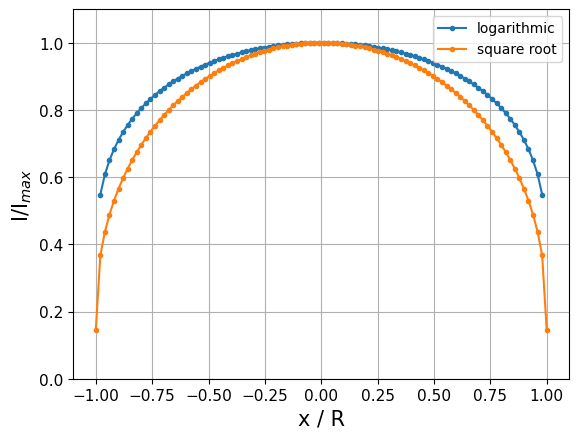

In [6]:
# plt.plot(r, D_sqrt)
# plt.plot(ratio*R, D_log,  ".-", label="logarithmic")
# plt.plot(ratio*R, D_sqrt, ".-", label="square root")
# plt.xlabel("x (km)", fontsize=15)

plt.plot(ratio, D_log,  ".-", label="logarithmic")
plt.plot(ratio, D_sqrt, ".-", label="square root")
plt.xlabel("x / R", fontsize=15)

plt.ylabel(r"I/I$_{max}$", fontsize=15)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.ticklabel_format(style='sci', scilimits=(0,0), axis='x')
plt.ylim(-0, 1.1)
plt.legend(fontsize=10)
plt.grid()

### Matrix

In [9]:
n  = 1024
dx = 2/n                         # (1-(-1))/n
Dm_log  = np.zeros((n,n))
Dm_sqrt = np.zeros((n,n))
for i in range(n):
    for j in range(i, n):
        x = -1 + dx/2 + dx*i
        y = -1 + dx/2 + dx*j
        r = np.sqrt(x**2 + y**2)
        if  r <= 1:
            Dm_log[i,j]  = D_logari(X,Y,r)
            Dm_log[j,i]  = D_logari(X,Y,r)
            Dm_sqrt[i,j] = Dm_sqrt[j,i] = D_sqroot(X,Y,r)
            
print(Dm_log[50,:])

[0. 0. 0. ... 0. 0. 0.]


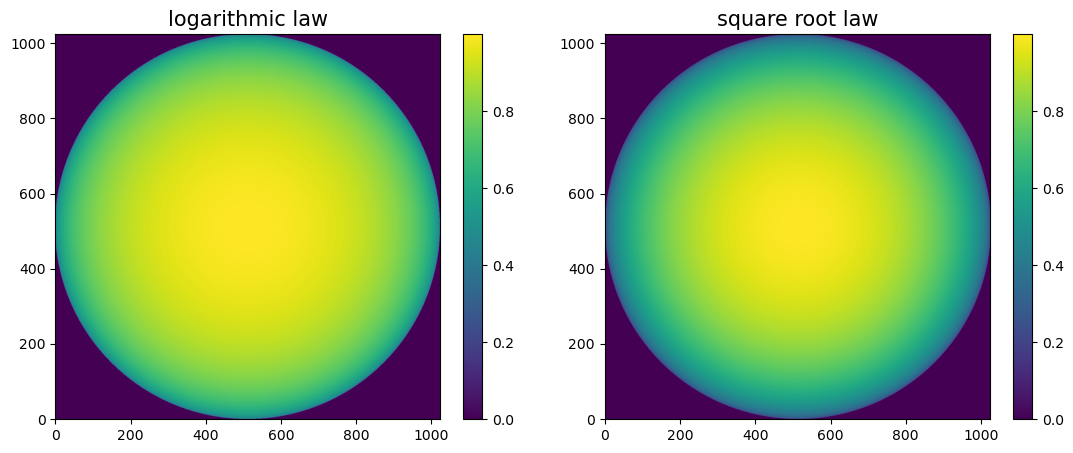

In [11]:
fig, ax = plt.subplots(1,2, figsize=(13,5))

a1 = ax[0].imshow(Dm_log, origin="lower")
a2 = ax[1].imshow(Dm_sqrt, origin="lower")
# ax[0].contour(Dm_log)
# ax[1].contour(Dm_sqrt)
ax[0].set_title("logarithmic law", fontsize=15)
ax[1].set_title("square root law", fontsize=15)

c1 = plt.colorbar(a1,ax=ax[0], fraction=0.046)
c2 = plt.colorbar(a2,ax=ax[1], fraction=0.046)
# c1.ax.tick_params(labelsize=12)

In [12]:
# 這區目前用不到
Imax = 1
I_tot = np.sum(Dm_log)*Imax*dx**2 #/ n**2
I_tot = np.sum(Dm_sqrt)*Imax*dx**2 #/ n**2

### location

In [14]:
hori = np.linspace(-1+dx, 1-dx, n)
vert = np.linspace(-1+dx, 1-dx, n)
xx, yy = np.meshgrid(hori, vert, indexing="ij")   # creat 一顆星照片的網格位置
print(yy[0,2])

-0.9941444434261975


In [15]:
R1 = 3       # R1,R2: rddius of two stars    # 如果 R1,R2 不同，上面創造的 matrix 的網格 n 就要不一樣。EX: n2 = n1*R2/R1
R2 = 3
x1_c = 0     # x1_c: x-coordinate of the center of star 1  
y1_c = 0
x2_c = 4
y2_c = 2
x1   = x1_c * np.ones((n,n)) + xx * R1
y1   = y1_c * np.ones((n,n)) + yy * R1
x2   = x2_c * np.ones((n,n)) + xx * R2
y2   = y2_c * np.ones((n,n)) + yy * R2

print(y1)

[[-2.99414062 -2.98828698 -2.98243333 ...  2.98243333  2.98828698
   2.99414062]
 [-2.99414062 -2.98828698 -2.98243333 ...  2.98243333  2.98828698
   2.99414062]
 [-2.99414062 -2.98828698 -2.98243333 ...  2.98243333  2.98828698
   2.99414062]
 ...
 [-2.99414062 -2.98828698 -2.98243333 ...  2.98243333  2.98828698
   2.99414062]
 [-2.99414062 -2.98828698 -2.98243333 ...  2.98243333  2.98828698
   2.99414062]
 [-2.99414062 -2.98828698 -2.98243333 ...  2.98243333  2.98828698
   2.99414062]]


(-4.0, 8.0)

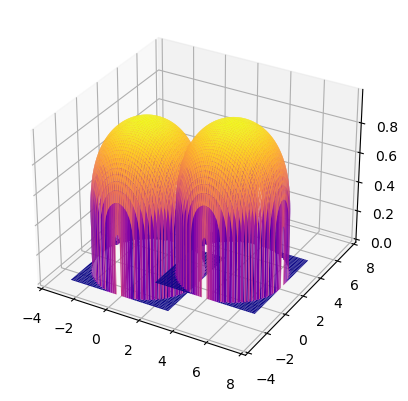

In [16]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(x1, y1, Dm_log, cmap='plasma')
ax.plot_surface(x2, y2, Dm_log, cmap='plasma')
# ax.view_init(90, -90)
ax.set_xlim(-4,8)
ax.set_ylim(-4,8)

In [22]:
z1 = 1
z2 = 2
star1 = 0     # 當下 star1 的總亮度
star2 = 0     # 當下 star2 的總亮度

if z2 > z1:                               # if satr2 in front of star1 (star2 擋住部分的 star1)
    star2 = np.sum(Dm_log) * dx**2
    for i in range(len(x1[:,0])):
        for j in range(len(y1[0,:])):
            d = np.sqrt( (x1[i,j] - x2_c) **2 + (y1[i,j] - y2_c) **2 )    # distance from the center of the other star
            if d > R2 and Dm_log[i,j] != 0:
                star1 += Dm_log[i,j] * dx**2

elif z1 > z2:
    star1 = np.sum(Dm_log) * dx**2
    for i in range(len(x2[:,0])):
        for j in range(len(y2[0,:])):
            d = np.sqrt( (x2[i,j] - x1_c) **2 + (y2[i,j] - y1_c) **2 )    # distance from the center of the other star
            if d > R1 and Dm_log[i,j] != 0:
                star2 += Dm_log[i,j] * dx**2

elif z1 == z2:
    star1 = np.sum(Dm_log) * dx**2
    star1 = np.sum(Dm_log) * dx**2


total = star1 + star2
print(total)

4.859336643757526
